1. Создайте однослойный перцептрон с 1, 2, 10 и 100 нейронами. Сравните их точность и сделайте вывод о достаточном количестве нейронов.

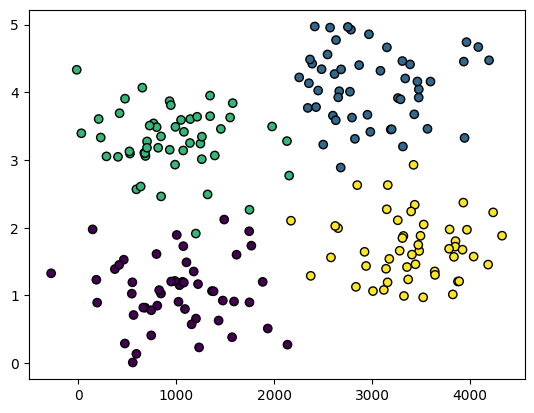

In [ ]:
blob_centers = ([1, 1], [3, 4], [1, 3.3], [3.5, 1.8])
X, y = make_blobs(n_samples=200,
                          centers=blob_centers,
                          cluster_std=0.5,
                          random_state=0)

X[:, 0] *= 1000 #Для удобства визуализации, значения в первом столбце матрицы X умножаются на 1000

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)

In [ ]:
# Загрузка набора данных Iris
data = load_iris()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler() # Инициализируем стандартизатор
scaler.fit(X_train) # Обучаем стандартизатор на обучающем наборе
X_train_scaled = scaler.transform(X_train) # Преобразуем обучающие данные
X_test_scaled = scaler.transform(X_test) # Преобразуем тестовые данные

In [ ]:
from sklearn.neural_network import MLPClassifier
neurons = [1, 2, 10, 100] # Количество нейронов для каждого перцептрона
for n in neurons:
    clf = MLPClassifier(hidden_layer_sizes=(n,), random_state=1).fit(X_train_scaled, y_train) # Создаем и обучаем перцептрон
    y_pred = clf.predict(X_test_scaled) # Получаем прогнозы на тестовых данных
    accuracy = accuracy_score(y_test, y_pred) # Вычисляем точность модели
    print(f"Модель с {n} нейронами (нейроном) - Точность: {accuracy}")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Модель с 1 нейронами (нейроном) - Точность: 0.3
Модель с 2 нейронами (нейроном) - Точность: 0.6333333333333333
Модель с 10 нейронами (нейроном) - Точность: 1.0
Модель с 100 нейронами (нейроном) - Точность: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


2. Создайте и оцените модель с двумя, тремя и десятью скрытыми слоями с одинаковым количеством нейронов. Сравните их точность и сделайте вывод о достаточном количестве слоев.


In [ ]:
model_2_layers = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)
model_2_layers.fit(X_train, y_train)
y_pred_2_layers = model_2_layers.predict(X_test)
accuracy_2_layers = accuracy_score(y_test, y_pred_2_layers)


In [ ]:
model_3_layers = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000, random_state=42)
model_3_layers.fit(X_train, y_train)
y_pred_3_layers = model_3_layers.predict(X_test)
accuracy_3_layers = accuracy_score(y_test, y_pred_3_layers)

In [ ]:
model_10_layers = MLPClassifier(hidden_layer_sizes=(10, 10, 10, 10, 10, 10, 10, 10, 10, 10), max_iter=1000, random_state=42)
model_10_layers.fit(X_train, y_train)
y_pred_10_layers = model_10_layers.predict(X_test)
accuracy_10_layers = accuracy_score(y_test, y_pred_10_layers)

In [ ]:
print("Точность модели с 2 скрытыми слоями:", accuracy_2_layers)
print("Точность модели с 3 скрытыми слоями:", accuracy_3_layers)
print("Точность модели с 10 скрытыми слоями:", accuracy_10_layers)

Точность модели с 2 скрытыми слоями: 0.9333333333333333
Точность модели с 3 скрытыми слоями: 0.9333333333333333
Точность модели с 10 скрытыми слоями: 0.9666666666666667


3. Для глубокой модели выведите веса всех нейронов на всех слоях. Выведите значения векторов весов смещения.

In [ ]:
# Вывод весов нейронов на всех слоях
print("Веса нейронов на всех слоях:")
for i, coef in enumerate(model_10_layers.coefs_):
    print(f"Слой {i}:")
    print(coef)

Веса нейронов на всех слоях:
Слой 0:
[[-7.39849075e-03  8.28856009e-01  3.99295359e-01  2.81530982e-01
  -1.64579771e-01 -1.64604284e-01 -2.69925890e-01  7.88277350e-01
   2.94259783e-01  4.62997016e-02]
 [-3.12574184e-01  8.12532164e-01  6.39396914e-01 -3.76692181e-01
  -1.38884503e-01 -1.37348584e-01 -3.84059087e-02  2.40407394e-01
  -6.50246997e-02 -4.67661966e-02]
 [ 4.41488584e-03 -4.96849663e-01 -4.50111405e-01  1.39433739e-01
  -1.24702353e-05  1.07815886e-01 -1.21803290e-01  3.60832782e-01
   3.87200627e-01 -2.83049022e-01]
 [ 3.66553894e-03 -5.57660590e-01 -7.94074945e-01  9.34140378e-01
   2.96784032e-01  1.29451165e-01 -3.81778499e-02 -1.89397747e-01
   5.25616495e-01 -1.24485431e-04]]
Слой 1:
[[ 2.15881396e-01  6.19892011e-02  1.89095092e-01  1.50856760e-01
   8.80383154e-04  1.73769097e-01 -1.64895409e-01 -8.10646404e-02
  -2.02601427e-01 -1.38275480e-02]
 [ 1.33717036e-01 -3.39724782e-01  9.87508573e-02 -6.05165924e-03
  -2.56201636e-01  3.76858163e-01 -6.21935960e-01  5.

In [ ]:
# Вывод значений векторов смещения
print("Значение векторов смещения:")
for i, intercept in enumerate(model_10_layers.intercepts_):
    print(f"Слой {i}:")
    print(intercept)

Значение векторов смещения:
Слой 0:
[-0.49486811  0.34896026 -0.29174209  0.45905834 -0.31583114  0.21279162
 -0.24652807  0.18178687  0.0171521  -0.41262237]
Слой 1:
[ 0.65222066 -0.47573277 -0.38899818 -0.01155392  0.51549065  0.10720224
  0.11499244  0.5389875  -0.28740367  0.30927323]
Слой 2:
[ 0.15939801  0.72953707 -0.10272095  0.02007913  0.41339149  0.24940817
  0.05076411  0.2218102  -0.08721247 -0.22610881]
Слой 3:
[-0.43732579 -0.54973818 -0.1254778   0.18625335 -0.4697393  -0.19830226
  0.15250874 -0.52222943  0.56454467 -0.23896612]
Слой 4:
[ 0.14174911  0.2021847  -0.14673938  0.42538656  0.28234805  0.53817935
 -0.53975519 -0.44660528  0.61870667  0.57109725]
Слой 5:
[-0.61925724  0.31975441 -0.3421149  -0.25018157  0.63359035 -0.03990346
  0.18493688 -0.38031312 -0.47969499 -0.50295323]
Слой 6:
[ 0.03569993 -0.3856613  -0.17899105 -0.40047866 -0.47829876  0.66261598
 -0.19460161  0.54757998 -0.12631773  0.30267026]
Слой 7:
[ 0.69676502  0.23207179 -0.41116143  0.4505417

4. Постройте и оцените модель с большим количеством нейронов и слоев. Замерьте время выполнения обучения, сравните со временем обучения более простых моделей.

In [ ]:
import time

# Обучение модели и замер времени выполнения
start_time = time.time()
clf.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time

# Предсказание на тестовом наборе
y_pred = clf.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)

print("Время обучения модели: {:.2f} секунд".format(training_time))
print("Точность модели: {:.2f}".format(accuracy))

Время обучения модели: 0.18 секунд
Точность модели: 1.00


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


5.Постройте и оцените модель классификации с помощью перцептрона на датасете, который вы использовали на контрольной по классификиации (если вы ее не выполняли, возьмите любой датасет из раздела "real world datasets" в библиотеке sklearn).

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score
# Загрузка данных
X, y = fetch_openml(data_id=1029, return_X_y=True, as_frame=True)

# Преобразование данных в массивы numpy
X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание экземпляра классификатора перцептрона
clf = Perceptron()

clf.fit(X_train, y_train)

# Предсказание меток классов для тестовых данных
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.285


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


6. Постройте и оцените модель регрессии с помощью перцептрона на датасете, который вы использовали на контрольной по регрессии.

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Загрузка данных
X, y = fetch_openml(data_id=1029, return_X_y=True, as_frame=True)

# Преобразование данных в массивы numpy
X = X.values
y = y.values

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Создание и обучение модели перцептрона
perceptron = Perceptron()
perceptron.fit(X_train, y_train)

# Предсказание значений
y_pred = perceptron.predict(X_test)

# Оценка модели с помощью среднеквадратичной ошибки
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.315


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
